# 1. Dynammic Programming이란?

동적 계획법(Dynamic Programming, DP)은 큰 문제를 작은 문제로 나눠서 푸는 알고리즘이다.

이 방식은 분할 정복(Devide Conquer)과 같은데 다만 분할 정복은 동적계획법과 달리 계산한 부분문제를 한번만 쓰고

더 이상 쓰지 않기 때문에 메모이제이션이 필요하지 않다. 분할 정복과 동적계획법의 근본적인 차이이다.

즉, 분할정복 + 메모이제이션 = Dynammic Programming으로 보는 사람들도 많다.

다만, 분할정복은 재귀호출로 쓰는 경우가 많고 Dynammic Programming은 재귀호출이 아닌 루프문으로 해결하는 경우가 많다.

## a. 분할정복(Devide Conquer)
분할 정복 알고리즘(Divide and conquer algorithm)은 그대로 해결할 수 없는 문제를 작은 문제로 분할하여 문제를 해결하는 방법이나 알고리즘이다.

빠른 정렬이나 합병 정렬로 대표되는 정렬 알고리즘 문제와 고속 푸리에 변환(FFT) 문제가 대표적이다. 분할 정복 알고리즘은 보통 재귀 함수(recursive function)를 통해 자연스럽게 구현된다.

## b. 메모이제이션
메모이제이션(memoization)은 컴퓨터 프로그램이 동일한 계산을 반복해야 할 때, 이전에 계산한 값을 메모리에 저장함으로써 동일한 계산의 반복 수행을 제거하여 프로그램 실행 속도를 빠르게 하는 기술이다. 동적 계획법의 핵심이 되는 기술이다. 메모아이제이션이라고도 한다.

## c. 예제

동적계획법 알고리즘의 대표적인 예 중 하나는 이항 계수(nCr 이라고도 한다)의 계산이다.

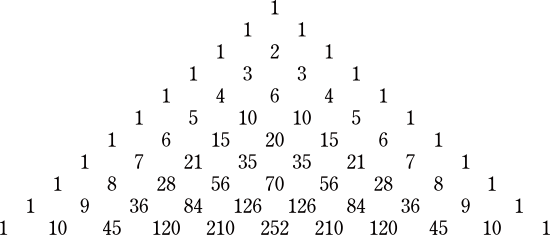

함수 bino(a, b)를 aCb라고 정의 한다면, 파스칼의 삼각형에 의해 bino(a, b) = bino(a - 1, b) + bino(a - 1, b - 1)이 성립이 된다.

만약 Devided Conquer로써 bino(4, 2)를 호출했을때 아래와 같이 함수가 재귀적으로 호출된다.
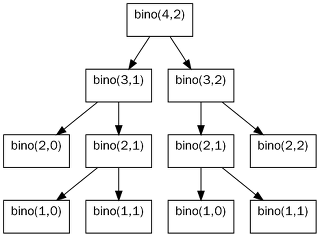
                Devide Conquer bino(4,2)

In [1]:
#Devide Conquer
def bino(a,b):
    if(a==b or b==0):
        return 1
    return bino(a-1,b)+bino(a-1,b-1)
print(bino(5,3))

10



메모이제이션을 사용하여 이전에 계산했던 것들을 저장해둔다면 함수 호출 횟수가 엄청나게 적어진다.
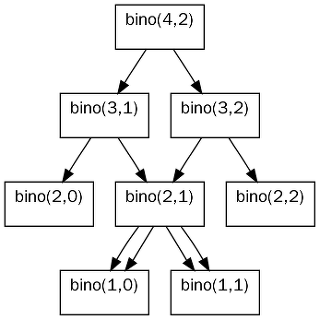
                Devide Conquer + memoization bino(4,2)

In [2]:
#Devide Conquer+memoization
import numpy
D = [[0 for rows in range(10)]for cols in range(10)]
def bino(a,b):
    if(D[a][b]!=0):
        return D[a][b]
    if(a==b or b==0):
        return 1
    D[a][b]=bino(a-1,b)+bino(a-1,b-1)
    return D[a][b]

즉, 동적계획법(Dynammic programming) 알고리즘은 일반적으로

1.구하고자 하는 큰 문제를 작은 부분문제로 나눈다. 

2.가장 작은 부분 문제(종료 조건, 주로 0 또는 1일때)부터 푼 뒤 값을 저장한다. --> 메모이제이션

3.메모이제이션된 부분 문제들의 해를 이용하여 차례로 더 큰 상위 문제의 답을 구한다.

4.(3)과정을 가장 큰 문제(구하고자 하는 큰 문제)에 도달할때까지 반복한다.

이러한 순서로 진행됩니다.

In [41]:
#DP without recursive function
D = [[0 for rows in range(10)]for cols in range(10)]
def bino(a,b):
    for i in range(0,a+1):
        D[a][0]=1
        D[i][i]=1
    for i in range(1,a+1):
        for j in range(0,i):
            if(D[i][j]==0):
                D[i][j]= D[i-1][j]+D[i-1][j-1]
    return D[a][b]
print(bino(5,2))
for i in D:
    print(i)

10
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 3, 1, 0, 0, 0, 0, 0, 0]
[1, 4, 6, 4, 1, 0, 0, 0, 0, 0]
[1, 5, 10, 10, 5, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


최종적으로 위와 같은 코드가 나오게 된다. 재귀호출을 사용하지 않으며 동적계획법을 만든 코드이다.


# 2. Fibonacci Numbers
피보나치 수는 다음과 같이 정의되는 수열이다.

F(n) = \begin{cases}0&{\mbox{if }}n=0;\\1&{\mbox{if }}n=1;\\F_{n-1}+F_{n-2}&{\mbox{if }}n>1.\\\end{cases}

피보나치 수를 조금 써보면, 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ... 와 같다.
#### 문제 (1) 재귀호출로 n번째 피보나치 수를 찾는 함수를 만들고, 시간복잡도를 구하시오.

In [ ]:
def Fibo(x):
    #Your Code here
    
    #End your Code
print(Fibo(10))

#### 문제 (2) 재귀호출 + memoization을 적용한 코드를 만들고, 시간복잡도를 구하시오.

In [ ]:
def Fibo2(x):
    #Your Code here
    
    #End your Code
print(Fibo2(10))

#### 문제 (3) 재귀호출을 사용하지 않은 코드를 만들고, 시간복잡도를 구하시오.

In [ ]:
def Fibo3(x):
    #Your Code here
    
    #End your Code
print(Fibo3(10))

# 3. 실전문제

#### 문제(1)

어떤 수열이 있을 때 연속된 구간의 최대합을 출력하려고 한다.

예를 들어 2 -6 4 5 -2 6 2 -1이라는 수열이 있다면 연속된 구간의 최대 부분합은 15이다. ( 4 + 5 + -2 + 6 + 2)

즉, 1차원 배열에서 연속된 부분 구간 중 그 합이 최대인 구간을 찾는 문제이다.

예) 배열 [-7, 4, -3, 6, 3, -8, 3, 4] 에서 최대 합을 갖는 부분 구간은 [4, -3, 6, 3] 으로 합은 10 이다

구간의 최대합을 구하는 알고리즘을 구하시오

#### 문제(2)
KU 나라에서는 돈의 단위가 1K, 5K, 10K, 50K, 100K라고 한다. 어떤 물건을 산 후 거스름돈이 nK일 때, 받을 수있는 거스름돈의 모든 경우의 수를 구하려고 한다. n을 입력받아 모든 경우의 수를 출력하는 알고리즘을 구하시오